## IMPORTING DEPENDENCIES

In [1]:
#Importing to build a network
import tensorflow as tf
from tensorflow.keras import layers, models
#Importing for mathematical calculations
import matplotlib.pyplot as plt
import numpy as np
import random
#importing to access local files
import os
#pre-process the image
import cv2
#to track the status
from tqdm import tqdm
%matplotlib inline

from keras.models import load_model

## PATH OF DATASET training set | validation set

In [2]:
# PATH of dataset
DATADIR_1 = "C:/Users/kevin/Desktop/Train"                 #path of main folder
CATEGORIES_1 = ["Apple___Black_rot", "Apple___healthy", "Potato___healthy", "Potato___Late_blight", "Tomato___Bacterial_spot", "Tomato___healthy"]      #path of sub folder
DATADIR_2 = "C:/Users/kevin/Desktop/Train"                #path of main folder
CATEGORIES_2 = ["Apple___Black_rot", "Apple___healthy", "Potato___healthy", "Potato___Late_blight", "Tomato___Bacterial_spot", "Tomato___healthy"]      #path of sub folder

## CROSS-CHECKING THE IMAGE

In [4]:
#Image check
temp = cv2.imread("C:/Users/kevin/Desktop/indian_currency_new/training/2000/3.jpg",cv2.IMREAD_COLOR)  # convert to array
temp = cv2.resize(temp, (120, 68))             # resize to normalize data size
#training_data.append([new_array_1, class_num_1])
plt.imshow(temp)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


## IMPORTING DATA FOR TRAINING

In [3]:
# IMPORTING TRAINING DATASET
training_data = []
def create_training_data():
    for category_1 in CATEGORIES_1:
        path_1 = os.path.join(DATADIR_1,category_1)
        class_num_1 = CATEGORIES_1.index(category_1)  # get the classification  (0 or a 1). 1=dog 0=cat
        for img_1 in tqdm(os.listdir(path_1)):        # iterate over each image per dogs and cats
            try:
                img_array_1 = cv2.imread(os.path.join(path_1,img_1) ,cv2.IMREAD_COLOR)  # convert to array
                new_array_1 = cv2.resize(img_array_1, (120, 68))                        # resize to normalize data size
                training_data.append([new_array_1, class_num_1])                        # add this to our training_data
            except Exception_1 as e_1:
                pass
create_training_data()     #calling the function
print("no of images imported for training : "+str(len(training_data)))

100%|█████████████████████████████████████████████████████████████████████████████| 1926/1926 [00:14<00:00, 135.99it/s]

no of images imported for training : 11386


## IMPORTING DATA FOR TESTING

In [4]:
#IMPORTING TEST DATASET
testing_data = []
def create_testing_data():
    for category_2 in CATEGORIES_2:
        path_2 = os.path.join(DATADIR_2,category_2)
        class_num_2 = CATEGORIES_2.index(category_2)  # get the classification  (0 or a 1). 1=dog 0=cat
        for img_2 in tqdm(os.listdir(path_2)):        # iterate over each image per dogs and cats
            try:
                img_array_2 = cv2.imread(os.path.join(path_2,img_2) ,cv2.IMREAD_COLOR)  # convert to array
                new_array_2 = cv2.resize(img_array_2, (120, 68))                        # resize to normalize data size
                testing_data.append([new_array_2, class_num_2])                         # add this to our testing_data
            except Exception_2 as e_2:
                pass
create_testing_data()     #calling the function
print("no of images imported for testing  : "+str(len(testing_data)))
print("   ")

100%|█████████████████████████████████████████████████████████████████████████████| 1926/1926 [00:03<00:00, 603.77it/s]

no of images imported for testing  : 11386
   


In [5]:
#random shuffling
random.shuffle(training_data)
random.shuffle(testing_data)

## RE-SHAPING THE IMAGE DIMENSIONS

In [6]:
# RESHAPING VALUES AND LABELS of train
X_1 = [] # X_1 = values of TRAIN SET
y_1 = [] # y_1 = labels of TRAIN SET
for features_1,label_1 in training_data:
    X_1.append(features_1)
    y_1.append(label_1)
X_1 = np.array(X_1).reshape(-1, 120, 68, 3)
train_set_y=np.matrix(y_1)

# RESHAPING VALUES AND LABELS of test
X_2 = [] # X_2 = values of TEST SET
y_2 = [] # y_2 = labels of TEST SET
for features_2,label_2 in testing_data:
    X_2.append(features_2)
    y_2.append(label_2)
X_2 = np.array(X_2).reshape(-1, 120, 68, 3)
test_set_y=np.matrix(y_2)

print("shape of values of training : "+str(X_1.shape))
print("shape of values of testing  : "+str(X_2.shape))
print("shape of labels of training : "+str(train_set_y.shape))
print("shape of labels of testing  : "+str(test_set_y.shape))
print("  ")

shape of values of training : (11386, 120, 68, 3)
shape of values of testing  : (11386, 120, 68, 3)
shape of labels of training : (1, 11386)
shape of labels of testing  : (1, 11386)
  


In [7]:
#flattening the image array
train_set_x_flatten = X_1.reshape(X_1.shape[0],-1).T
test_set_x_flatten  = X_2.reshape(X_2.shape[0],-1).T

#dividing with pexel value for better perfomance
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
#print(X_1)

print ("train value flatten shape    : " + str(train_set_x_flatten.shape))
print ("test value flatten shape     : " + str(test_set_x_flatten.shape))
print ("train label shape            : " + str(train_set_y.shape))
print ("test label shape             : " + str(test_set_y.shape))
print ("sanity check after reshaping : " + str(train_set_x_flatten[0:5,0]))
print("  ")


train value flatten shape    : (24480, 11386)
test value flatten shape     : (24480, 11386)
train label shape            : (1, 11386)
test label shape             : (1, 11386)
sanity check after reshaping : [0 0 0 0 0]
  


In [8]:
X_train = train_set_x
X_test = test_set_x
#print(X_train)
#print(y_train)
#print(train_set_y)
y_train = train_set_y

## FRAMING LAYERS convolution | dense

In [9]:
# 4-Convolutional Layers | 2-Dense Layers 
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(120, 68, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    
    #layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(8, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 66, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 33, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 6, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 4, 64)         3

## DEFINING MODEL loss | optimizers | metrics

In [10]:
#cnn.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

#Defining model optimizers, loss function and metrics
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
#np.transpose(y_train)
#X_train = X_1.reshape(X_1.shape[0], -1)
y_train = train_set_y.reshape(train_set_y.shape[0], -1).T
#y_train = y_train.reshape(-1,)
#print(y_train)
#print(X_train)

#np.transpose(y_train)
X_train = X_1.reshape(X_1.shape[0], -1)
y_test = test_set_y.reshape(test_set_y.shape[0], -1).T
#y_train = y_train.reshape(-1,)
#print(y_train)
#print(X_train)

## RE-CHECKING DATA DIMENSIONS

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_train.ndim)
print(y_train.ndim)

print(type(X_train.ndim))
print(type(y_train.ndim))
print(X_1.shape) #Required shape | no of images, Width, Height, no of Colour Chanels

(11386, 24480)
(11386, 1)
2
2
<class 'int'>
<class 'int'>
(11386, 120, 68, 3)


In [13]:
tf.config.run_functions_eagerly(True)

## COMPILE MODEL

In [14]:
#Callback Function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.8):
            print("\n Model has Reached 80% accuracy so cancelling training")
            self.model.stop_training = True
            
callbacks = myCallback()

In [15]:
model_metrics = cnn.fit(X_1, y_train, epochs=40, callbacks=[callbacks], validation_data=(X_2, y_test))
#cnn.fit(X_1, y_train, epochs=5, batch_size=4)

C:\Users\kevin\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/40
356/356 [==============================] - 198s 556ms/step - loss: 5.2009 - accuracy: 0.4212 - val_loss: 0.8311 - val_accuracy: 0.6855
Epoch 2/40
356/356 [==============================] - 197s 552ms/step - loss: 0.7629 - accuracy: 0.7130 - val_loss: 0.4830 - val_accuracy: 0.8261
Epoch 3/40
356/356 [==============================] - 212s 597ms/step - loss: 0.5257 - accuracy: 0.8072 - val_loss: 0.2943 - val_accuracy: 0.8928

 Model has Reached 80% accuracy so cancelling training


## PLOTTING MODEL'S METRICS

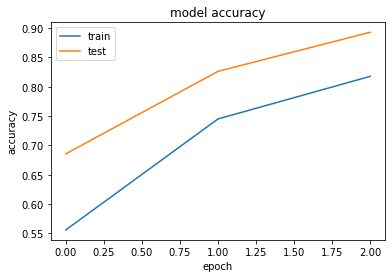

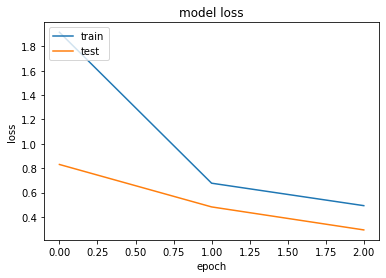

In [16]:
# summarize history for accuracy
plt.plot(model_metrics.history['accuracy'])
plt.plot(model_metrics.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_metrics.history['loss'])
plt.plot(model_metrics.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## DISPLAYING MODEL METRICS

In [17]:
train_loss, train_acc = cnn.evaluate(X_1,  y_train, verbose=2)
test_loss, test_acc = cnn.evaluate(X_2,  y_test, verbose=2)

training_accuracy = train_acc*100
training_loss = train_loss*100

validation_accuracy = test_acc*100
validation_loss = test_loss*100

print(" ")
print("Training Accuracy = ",int(training_accuracy),'%')
#print("Training Loss = ",int(training_loss),'%')

print("Validation Accuracy = ",int(validation_accuracy),'%')
#print("Validation Loss = ",int(validation_loss),'%')

356/356 - 40s - loss: 0.2943 - accuracy: 0.8928
356/356 - 46s - loss: 0.2943 - accuracy: 0.8928
 
Training Accuracy =  89 %
Validation Accuracy =  89 %


## WRAPPING UP TO TEST OUR INPUT

In [18]:
def Final_Prediction(file_name):
    label = 0
    my_image = file_name    #path of image
    print("File name is : " , my_image )
    fname = "C:/Users/kevin/Desktop/" + my_image
    reading_image = cv2.imread(fname ,cv2.IMREAD_COLOR)  # convert to array
    plt.imshow(reading_image) # Displaying image
    resized_image = cv2.resize(reading_image, (120, 68))
    image_array = np.array(resized_image).reshape(-1, 120, 68, 3)
    #print(x.shape)
    my_predicted_image = cnn.predict(image_array)
    print(" ")
    print("Predicted values in output layer : " )
    print(my_predicted_image)
    # using argmax
    label_inside=np.argmax(my_predicted_image)
    print(" ")
    print("Predicted Label : " , label_inside)
    label = label_inside
    print("__________________________________________________________________________________________")
    
    if label==0:
        print("The image is calssified  as Apple Black Rot")
    elif label==1:
        print("The image is calssified  as Healthy Apple") 
    elif label==2:
        print("The image is calssified  as Health Potato")
    elif label==3:
        print("The image is calssified  as Potato Late Blight")
    elif label==4:
        print("The image is calssified  as Tomato Bacterial Spot")
    elif label==5:
        print("The image is calssified  as Tomato Healthy")
    else:
        print("Please input valid image")

## TESTING OUR OWN DATA

File name is :  potato_disease.JPG
 
Predicted values in output layer : 
[[2.3358850e-02 1.9461652e-02 1.4625317e-01 7.4860287e-01 6.1754785e-03
  5.6143995e-02 4.0188893e-06 2.2754675e-08]]
 
Predicted Label :  3
__________________________________________________________________________________________
The image is calssified  as Potato Late Blight


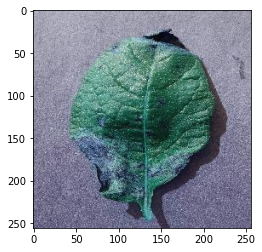

In [20]:
Final_Prediction("potato_disease.JPG") #input file name with format

## SAVING MODEL

In [20]:
cnn.save('CNN_Multi_Class.h5')

## LOAD MODEL

In [ ]:
#cnn=load_model('./CNN_Multi_Class.h5')
    # or
#cnn = tf.keras.models.load_model('CNN_Multi_Class.h5')